<!--NAVIGATION-->
< [使用Numpy计算：通用函数](02.03-Computation-on-arrays-ufuncs.ipynb) | [目录](Index.ipynb) | [在数组上计算：广播](02.05-Computation-on-arrays-broadcasting.ipynb) >

<a href="https://colab.research.google.com/github/wangyingsm/Python-Data-Science-Handbook/blob/master/notebooks/02.04-Computation-on-arrays-aggregates.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>


# Aggregations: Min, Max, and Everything In Between

# 聚合：Min，Max和其他

> Often when faced with a large amount of data, a first step is to compute summary statistics for the data in question.
Perhaps the most common summary statistics are the mean and standard deviation, which allow you to summarize the "typical" values in a dataset, but other aggregates are useful as well (the sum, product, median, minimum and maximum, quantiles, etc.).

通常来说，当我们面对大量数据时，第一步就是计算数据集的概要统计结果。也许最重要的概要统计数据就是平均值和标准差，它们能归纳出数据集典型的数值，但是其他的聚合函数也很用（如求和、乘积、中位值、最小值和最大值、分位数等）。

> NumPy has fast built-in aggregation functions for working on arrays; we'll discuss and demonstrate some of them here.

NumPy内建有非常快速的函数用于计算数组的统计值；本节中我们会讨论其中常用的部分。

## Summing the Values in an Array

## 在数组中求总和

> As a quick example, consider computing the sum of all values in an array.
Python itself can do this using the built-in ``sum`` function:

首先，我们用一个简单例子来计算数组所有元素值的总和。使用Python內建的`sum`函数：

In [1]:
import numpy as np

In [2]:
L = np.random.random(100)
sum(L)

54.47499738668567

> The syntax is quite similar to that of NumPy's ``sum`` function, and the result is the same in the simplest case:

NumPy的`sum`函数的语法也差不多，当然，结果也是一样的。

In [3]:
np.sum(L)

54.47499738668566

> However, because it executes the operation in compiled code, NumPy's version of the operation is computed much more quickly:

然后，因为NumPy的函数是编译执行的，因此它的性能会远远超越Python的內建函数：

In [4]:
big_array = np.random.rand(1000000)
%timeit sum(big_array)
%timeit np.sum(big_array)

88.3 ms ± 2.84 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
564 µs ± 17.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


> Be careful, though: the ``sum`` function and the ``np.sum`` function are not identical, which can sometimes lead to confusion!
In particular, their optional arguments have different meanings, and ``np.sum`` is aware of multiple array dimensions, as we will see in the following section.

要注意的是：`sum`内建函数和`np.sum`并不完全相同，这有时会导致混乱。特别的，两个函数的可选参数有着不同的含义，而且`np.sum`函数可以处理多维数组运算，我们将在后续章节看到。

## Minimum and Maximum

## 最小值和最大值

> Similarly, Python has built-in ``min`` and ``max`` functions, used to find the minimum value and maximum value of any given array:

类似的，Python也有內建`min`和`max`函数，用来计算数组的最小值和最大值：

In [5]:
min(big_array), max(big_array)

(2.5903288636275335e-06, 0.9999992774771906)

> NumPy's corresponding functions have similar syntax, and again operate much more quickly:

NumPy对应的函数也有相似的语法，但是执行高效很多：

In [6]:
np.min(big_array), np.max(big_array)

(2.5903288636275335e-06, 0.9999992774771906)

In [7]:
%timeit min(big_array)
%timeit np.min(big_array)

61 ms ± 1.39 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
744 µs ± 45.6 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


> For ``min``, ``max``, ``sum``, and several other NumPy aggregates, a shorter syntax is to use methods of the array object itself:

对于`min`，`max`，`sum`和其他NumPy聚合函数来说，也可以通过`ndarray`对象的相应方法进行调用：

In [8]:
print(big_array.min(), big_array.max(), big_array.sum())

2.5903288636275335e-06 0.9999992774771906 499718.9807141967


> Whenever possible, make sure that you are using the NumPy version of these aggregates when operating on NumPy arrays!

任何情况下，当你操作NumPy数组时，你都应该使用NumPy的聚合函数来代替Python的內建函数。

### Multi dimensional aggregates

### 多维聚合

> One common type of aggregation operation is an aggregate along a row or column.
Say you have some data stored in a two-dimensional array:

还有一种需求，我们可能需要沿着行或列进行聚合。比方说你有一个二维数组：

In [9]:
M = np.random.random((3, 4))
print(M)

[[0.27614977 0.75224804 0.69322493 0.55140476]
 [0.6698524  0.92722784 0.20959198 0.78538042]
 [0.05078426 0.58621268 0.7614707  0.77247016]]


> By default, each NumPy aggregation function will return the aggregate over the entire array:

默认情况下，NumPy聚合函数都会返回整个数组的聚合结果标量：

In [10]:
M.sum()

7.03601794886263

> Aggregation functions take an additional argument specifying the *axis* along which the aggregate is computed. For example, we can find the minimum value within each column by specifying ``axis=0``:

聚合函数可以接收一个额外的参数指定一个*轴*让函数沿着这个方向进行聚合运算。例如，我们可以沿着行的方向计算每列的最小值，通过指定`axis=0`参数即可：

In [11]:
M.min(axis=0)

array([0.05078426, 0.58621268, 0.20959198, 0.55140476])

> The function returns four values, corresponding to the four columns of numbers.

这个函数返回四个值，对应着四列。

> Similarly, we can find the maximum value within each row:

类似的，我们也可以计算每一行的最大值：

In [12]:
M.max(axis=1)

array([0.75224804, 0.92722784, 0.77247016])

> The way the axis is specified here can be confusing to users coming from other languages.
The ``axis`` keyword specifies the *dimension of the array that will be collapsed*, rather than the dimension that will be returned.
So specifying ``axis=0`` means that the first axis will be collapsed: for two-dimensional arrays, this means that values within each column will be aggregated.

上述指定axis参数的方式可能会让具有其他编程语言基础的用户感到不适应。这里的`axis`参数指定的是*让数组沿着这个方向进行压缩*，而不是指定返回值的方向。因此指定`axis=0`意味着第一个维度将被压缩：对于一个二维数组来说，就是数组将沿着列的方向进行聚合运算操作。

### Other aggregation functions

### 其他聚合函数

> NumPy provides many other aggregation functions, but we won't discuss them in detail here.
Additionally, most aggregates have a ``NaN``-safe counterpart that computes the result while ignoring missing values, which are marked by the special IEEE floating-point ``NaN`` value (for a fuller discussion of missing data, see [Handling Missing Data](03.04-Missing-Values.ipynb)).
Some of these ``NaN``-safe functions were not added until NumPy 1.8, so they will not be available in older NumPy versions.

NumPy提供了许多其他聚合函数，但是我们不会在这里详细讨论它们。需要说明的是，很多聚合函数都有一个`NaN`安全的版本，可以忽略空缺的数据并计算得到正确的结果。`NaN`即为IEEE标准中浮点数非数值的定义（完整的讨论空缺数据的内容请参见[处理空缺数据](03.04-Missing-Values.ipynb)）。部分`NaN`安全的函数版本是在NumPy 1.8之后加入的，因此在老版本的NumPy中可能无法使用。

> The following table provides a list of useful aggregation functions available in NumPy:

下表列出了NumPy中有用的聚合函数：

| 函数名称      |   NaN安全版本  | 说明                                   |
|-------------------|---------------------|-----------------------------------------------|
| ``np.sum``        | ``np.nansum``       | 计算总和                       |
| ``np.prod``       | ``np.nanprod``      | 计算乘积                   |
| ``np.mean``       | ``np.nanmean``      | 计算平均值                      |
| ``np.std``        | ``np.nanstd``       | 计算标准差                    |
| ``np.var``        | ``np.nanvar``       | 计算方差                              |
| ``np.min``        | ``np.nanmin``       | 计算最小值                            |
| ``np.max``        | ``np.nanmax``       | 计算最大值                            |
| ``np.argmin``     | ``np.nanargmin``    | 寻找最小值的序号                   |
| ``np.argmax``     | ``np.nanargmax``    | 寻找最大值的序号                   |
| ``np.median``     | ``np.nanmedian``    | 计算中位值                    |
| ``np.percentile`` | ``np.nanpercentile``| 计算百分比分布的对应值     |
| ``np.any``        | N/A                 | 是否含有True值        |
| ``np.all``        | N/A                 | 是否全为True值        |

> We will see these aggregates often throughout the rest of the book.

我们在本书后续内容中会经常看到这些聚合函数。

## Example: What is the Average Height of US Presidents?

## 例子：美国总统的平均身高？

> Aggregates available in NumPy can be extremely useful for summarizing a set of values.
As a simple example, let's consider the heights of all US presidents.
This data is available in the file *president_heights.csv*, which is a simple comma-separated list of labels and values:

在NumPy中使用聚合统计来对一个数据集进行概要说明是非常有用的。下面我们使用美国总统的身高作为一个简单的例子来说明。这些数据存储在文件*president_heights.csv*里，文件格式就是简单的逗号分隔的文本文件：

In [13]:
!head -4 data/president_heights.csv

order,name,height(cm)
1,George Washington,189
2,John Adams,170
3,Thomas Jefferson,189


> We'll use the Pandas package, which we'll explore more fully in [Chapter 3](03.00-Introduction-to-Pandas.ipynb), to read the file and extract this information (note that the heights are measured in centimeters).

我们会使用Pandas包来读取文件和提取数据（注意身高单位是厘米），Pandas的相关内容我们会在[第三章](03.00-Introduction-to-Pandas.ipynb)中详细介绍。

In [14]:
import pandas as pd
data = pd.read_csv('data/president_heights.csv')
heights = np.array(data['height(cm)'])
print(heights)

[189 170 189 163 183 171 185 168 173 183 173 173 175 178 183 193 178 173
 174 183 183 168 170 178 182 180 183 178 182 188 175 179 183 193 182 183
 177 185 188 188 182 185]


> Now that we have this data array, we can compute a variety of summary statistics:

获得了NumPy数组之后，我们就能计算各种的基本统计数据了：

In [15]:
print("Mean height:       ", heights.mean()) # 身高平均值
print("Standard deviation:", heights.std()) # 标准差
print("Minimum height:    ", heights.min()) # 最小值
print("Maximum height:    ", heights.max()) # 最大值

Mean height:        179.73809523809524
Standard deviation: 6.931843442745892
Minimum height:     163
Maximum height:     193


> Note that in each case, the aggregation operation reduced the entire array to a single summarizing value, which gives us information about the distribution of values.
We may also wish to compute quantiles:

上述结果中，每个聚合函数都将整个数组计算后得到一个标量值，可以让我们初步了解数据的基本分布信息。下面来计算分位值：

In [16]:
print("25th percentile:   ", np.percentile(heights, 25)) # 25% 分位值
print("Median:            ", np.median(heights)) # 50% 分位值 - 中位值
print("75th percentile:   ", np.percentile(heights, 75)) # 75% 分位值

25th percentile:    174.25
Median:             182.0
75th percentile:    183.0


> We see that the median height of US presidents is 182 cm, or just shy of six feet.

我们看到美国总统身高的中位值是182厘米，也就是6英尺。

> Of course, sometimes it's more useful to see a visual representation of this data, which we can accomplish using tools in Matplotlib (we'll discuss Matplotlib more fully in [Chapter 4](04.00-Introduction-To-Matplotlib.ipynb)). For example, this code generates the following chart:

当然，有时对数据进行图表展示会更加直观，我们可以通过Matplotlib工具进行（Matplotlib的知识会在[第四章](04.00-Introduction-To-Matplotlib.ipynb)详细介绍）。例如，下述代码产生相应的图表：

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # 设置图表的风格为seaborn

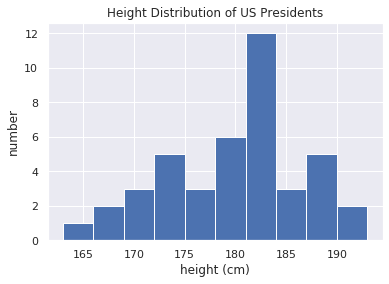

In [18]:
plt.hist(heights)
plt.title('Height Distribution of US Presidents')
plt.xlabel('height (cm)')
plt.ylabel('number');

> These aggregates are some of the fundamental pieces of exploratory data analysis that we'll explore in more depth in later chapters of the book.

这些聚合数据提供了我们对于数据集最基本的理解，我们会在本书后续章节更加深入的讨论它们。

<!--NAVIGATION-->
< [使用Numpy计算：通用函数](02.03-Computation-on-arrays-ufuncs.ipynb) | [目录](Index.ipynb) | [在数组上计算：广播](02.05-Computation-on-arrays-broadcasting.ipynb) >

<a href="https://colab.research.google.com/github/wangyingsm/Python-Data-Science-Handbook/blob/master/notebooks/02.04-Computation-on-arrays-aggregates.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>
